In [2]:
import tensorflow
tensorflow.__version__

'2.9.2'

In [4]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Import dataset
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
print(y_train.shape)
print("First 5 examples are: ", y_train[0:5])

(60000,)
First 5 examples are:  [5 0 4 1 9]


Label: 0


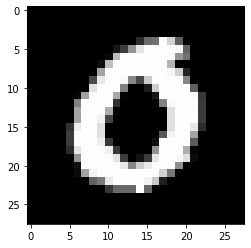

In [7]:
# Let's visualize some numbers using matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[8000]))
plt.imshow(X_train[8000], cmap='gray')

In [8]:
# Print shape of the data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
# One-hot encode the class vector ... to use categorical_crossentropy as loss
from tensorflow import keras
from keras.utils import to_categorical

print("Value before encoding:", y_train[0])

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train after encoding:", y_train.shape)
print("One hot encoded value of y_train:", y_train[0])


Value before encoding: 5
Shape of y_train after encoding: (60000, 10)
One hot encoded value of y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
# Define the model
#   - The Sequential model is a linear stack of layers.
#   - The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model 
#     (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape.
#   - You can also simply add layers via the .add() method

# Initialize Sequential model
model = tensorflow.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tensorflow.keras.layers.Reshape((784,), input_shape=(28,28,)))

# Normalize the data
model.add(tensorflow.keras.layers.BatchNormalization())

# Hidden layers
model.add(tensorflow.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tensorflow.keras.layers.Dense(100, activation='relu', name='Layer_2'))

# Dropout layer
model.add(tensorflow.keras.layers.Dropout(0.5))

# Hidden layers
model.add(tensorflow.keras.layers.Dense(60, activation='relu', name='Layer_3'))
model.add(tensorflow.keras.layers.Dense(30, activation='relu', name='Layer_4'))

# Dropout layer
model.add(tensorflow.keras.layers.Dropout(0.3))

# Output layer
model.add(tensorflow.keras.layers.Dense(10, activation='softmax', name='Output'))

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 Layer_1 (Dense)             (None, 200)               157000    
                                                                 
 Layer_2 (Dense)             (None, 100)               20100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 Layer_3 (Dense)             (None, 60)                6060      
                                                        

In [13]:
# Fit the model
#   - .fit() trains the model for a fixed number of epochs (iterations on a dataset)
#   - An epoch is an iteration over the entire x and y data provided
#   - batch_size is the number of samples per gradient update
#   - validation_data is the data on which to evaluate the loss and any model metrics at the end of each epoch

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size= 32)

Epoch 1/30
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4921 - accuracy: 0.8578 - val_loss: 0.2207 - val_accuracy: 0.9520
Epoch 2/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2365 - accuracy: 0.9387 - val_loss: 0.1696 - val_accuracy: 0.9593
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1840 - accuracy: 0.9525 - val_loss: 0.3009 - val_accuracy: 0.9655
Epoch 4/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1520 - accuracy: 0.9621 - val_loss: 0.2161 - val_accuracy: 0.9701
Epoch 5/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1306 - accuracy: 0.9672 - val_loss: 0.2258 - val_accuracy: 0.9718
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1154 - accuracy: 0.9703 - val_loss: 0.1904 - val_accuracy: 0.9696
Epoch 7/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1050 - accuracy: 0.9732 - val_loss: 0.2264 - val_ac

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2607 - accuracy: 0.9746


[0.26074957847595215, 0.9746000170707703]